In [1]:
import pandas as pd
import numpy as npв
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import  (
    accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, precision_score,
    recall_score
)
import warnings
warnings.filterwarnings("ignore")


In [2]:
RND = 12345

In [3]:
df = pd.read_csv('d:\\kaggle\\adult.csv')

## Анализ данных

Задача классификации. Цель: необходимо разработать модель машинного обучения, позволяющую на основе данных о возрасте, образовании, семейном положении, рассе, пол, количестве отроботанных часов в неделю, станы пребытия определить больше или меньше 50 тыс. долларов доход человека в год. 

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [10]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [13]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [14]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [17]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [18]:
for i in df.columns:
    print('{:<15} {:>5}'.format(i, df[i].nunique()))

age                74
workclass           9
fnlwgt          28523
education          16
educational-num    16
marital-status      7
occupation         15
relationship        6
race                5
gender              2
capital-gain      123
capital-loss       99
hours-per-week     96
native-country     42
income              2


In [19]:
df.income.value_counts(normalize = True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

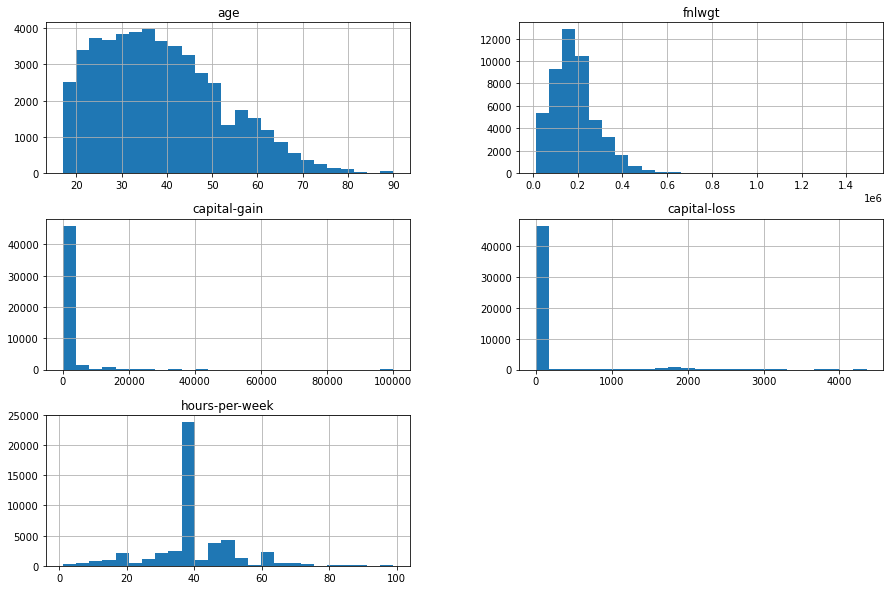

In [20]:
df[['age','fnlwgt','capital-gain','capital-loss', 'hours-per-week' ]].hist(bins=25, figsize = (15,10))

In [21]:
# Удалим данный столбец, так как final weight - количесвто подобных строк, вряд ли может что-то помочь прогнозировать
df = df.drop('fnlwgt', axis = 1)

In [22]:
df[['age','capital-gain','capital-loss', 'hours-per-week']].describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [23]:
df[['age','capital-gain','capital-loss', 'hours-per-week' ]].corr()

,age,capital-gain,capital-loss,hours-per-week
age,1.000000,0.077229,0.056944,0.071558
capital-gain,0.077229,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.082157,0.054467,1.000000


## Переработка данных

Имеется несколько столбцов, которые относятся строковому типу, но по сути явлющиеся категориальными 

In [24]:
df['workclass'] = df['workclass'].replace('?', 'unknowen')
df['occupation'] = df['occupation'].replace('?', 'unknowen')
df['native-country'] = df['native-country'].replace('?', 'unknowen')

In [25]:
# категорильные данные
tmp_col = ['workclass',  'education','educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'native-country']

In [26]:
for col in tmp_col:
    df[col] = df[col].astype('category')

In [27]:
# заменили целевой признак на 0 и 1
df['income'] = df['income'].map({'<=50K' : 0, '>50K':1}) 

In [28]:
numerics = ['age','capital-gain','capital-loss', 'hours-per-week']
scaler = StandardScaler()
df[numerics] = scaler.fit_transform(df[numerics])


In [29]:
df_reddy = pd.get_dummies(df, drop_first=True)

In [30]:
X = df_reddy.drop(['income'], axis=1)
y = df_reddy['income']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND, stratify=y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 113), (9769, 113), (39073,), (9769,))

## Разработка моделей

In [33]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [34]:
pred = model_lr.predict(X_test)
accuracy_score(pred, y_test)

0.8086805200122837

In [36]:
confusion_matrix(pred, y_test)

array([[5899,  337],
       [1532, 2001]], dtype=int64)